In [1]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 현재 경로 확인
!pwd

/content


In [3]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


## 데이터 학습 단위 및 용어 

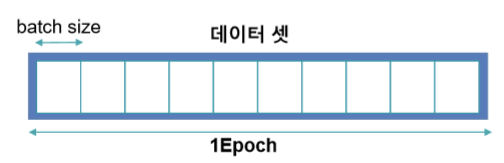

```python
1. 전체 데이터 셋 => 가지고 있는 전체 데이터 
2. Epoch => 전체 데이터 셋을 한번 학습 했을 때의 단위. 1 Epoch은 전체 데이터를 한 번 학습 / Epoch = 전체 데이터 셋/Batch size 
3. Iteration => 학습 횟수. 1 Iteration은 1회 학습 
4. Batch size => 1 Iteration에 사용되는 데이터 크기 
5. Stochastic => 학습 데이터를 하나씩 사용하면서 가중치를 업데이트 하는 방법 

전체 데이터를 한꺼번에 학습하면 메모리 문제가 발생하고 정교하지 않게 가중치가 업데이트 되는 문제가 있을 수 있다 
그래서 전체 데이터를 한꺼번에 사용하지 않고 데이터를 조각 내서 사용하면 한꺼번에 학습 하는 것보다 속도가 느려지긴 하지만 
정교하게 가중치가 업데이트 되기 때문에 목표하는 모델을 만들수 있는 가능성이 높아진다 
```

## One Data 1D Vector 

```
Neural network의 연산은 array기반의 vectorization연산을 하고 fully connected하기 때문에 하나의 데이터는 1차원의 vector를 입력값으로 받아야 한다 

Neural network에서 이미지 데이터를 활용한다면 
이미지 데이터 특성상 1차원으로 변환하면 계산복잡도가 증가한다는 문제가 발생한다 
```

## Neural Network for image data 

## Image data

```python 
이미지 데이터의 특성 

1. 이미지 데이터는 2차원 이상이다 
2. 전통적인 머신러닝을 사용하려면 하나의 데이터가 일차원 형태로 변환해야 한다
3. 2차원 데이터에서 1차원 데이터로 변환할 경우 Locality를 잃어버린다(주변 값과의 관계가 사라진다) 
4. I.I.D가 아니다 
5. Neural Network에서 Fully connected한 특징때문에 1차원으로 변형시 feature가 기하 급수적으로 늘어난다(연산 복잡도가 폭발적으로 증가한다) 

```

## 두 가지 해결 방법 (Column이 많은 이미지 데이터) 

```python
1. 다른 문제로 환원
- 원본 이미지를 다른 형태로 바꾼다 
- Feature가 있는지 없는지 여부의 문제로 환원한다 
- Feature문제로 환원했을 때 중요한 것은 어떤 Feature를 뽑아 내야 하는지가 관건이다  
2. 전처리 
- 사이즈 조절 
- 차원 조절 
- 의미를 잃어버리기 때문에 추가적인 가정이 필요하다 
```

## Tensorflow 

```
Tensorflow는 numpy를 기반으로 autograd(자동 미분)을 지원하고 neural network에서 자주 사용하는 기능들을 지원해주는 라이브러리이다 
뿐만 아니라 numpy는 연산이 복잡해지면 속도가 느려지는데 gpu연산이 가능하도록 지원하도록 만들어졌기 때문에 훨씬 효율적인 NN 프로그래밍을 도와준다 
(GPU사용시 50배 이상 속도가 빨라진다) 
```

In [1]:
import tensorflow as tf 

In [6]:
tf.__version__ # 2.3버전 이후에 많이 바뀌었기 때문에 본 수업은 2.3버전 이상에서 진행된다 

'2.6.0'

In [7]:
tf.version.VERSION

'2.6.0'

In [8]:
tf.executing_eagerly() 

True

## Neural Network를 구성하는 6가지 방법 

```python
1. tf.keras.models.Sequential
2. tf.keras.models.Model            # 전문가적인 방식          
3. subclass (tf.keras.models.Model) # 전문가적인 방식 
4. tf.estimator.
5. tf.nn.
6. tf.Module # Meta class 방식 

2,3번 방식을 집중적으로 알아볼 것이다 
```

In [13]:
a = tf.constant([1,2,3]) # Tensor라고 나오면 상수 / immutable 
b = tf.Variable([1,2,3]) # Varaible은 이름이 있다 / mutable => 가중치를 갱신할때 사용한다 

In [14]:
a

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [15]:
b

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [16]:
b.assign([3,4,5]) 

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 4, 5], dtype=int32)>

In [17]:
b

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([3, 4, 5], dtype=int32)>

In [2]:
tf.debugging.set_log_device_placement(True) # gpu연산을 하는지 확인할 수 있다 / colab에서 사용시 Runtime type을 GPU로 바꾼후 확인해 보세요 

In [3]:
a = tf.constant([1,2,3])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


In [4]:
a + a

Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 6], dtype=int32)>

In [5]:
b = tf.Variable([1,2,3]) 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [6]:
b+b

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 6], dtype=int32)>

In [7]:
d = tf.constant([3,4,5])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


In [9]:
'__array_priority__' in dir(d) # numpy와 호환된다 

True

In [10]:
d.numpy()

array([3, 4, 5], dtype=int32)

In [11]:
import numpy as np

In [12]:
a = tf.constant([1,2,3]) 
b = tf.Variable([1,2,3])
c = np.array([1,2,3])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [16]:
%timeit np.add(a,a) # numpy method에 tensor를 넣어도 된다 / tensor => numpy 변환 후 numpy operation을 한다 / 이때는 resource가 적게 들어간다 

The slowest run took 24.50 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 9.62 µs per loop


In [14]:
np.add(b,b)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0


array([2, 4, 6], dtype=int32)

In [17]:
%timeit tf.add(c,c) # tensor연산에 numpy를 넣으면 gpu를 사용하여 연산한다 / numpy에서 tensor로 타입을 바꾼 후 tensor operation을 한다 / 이때는 resource가 많이 들어간다 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task

In [18]:
%timeit tf.add(a,a) # 데이터 양이 많다면 텐서데이터로 텐서 연산할 때가 가장 빠르다 

Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:loca

```
numpy데이터를 tensor연산했을때가 tensor데이터를 numpy연산 했을 때 보다 훨씬 속도가 느리다 
따라서 numpy데이터 타입일 경우 tensor로 변환 후 연산하는 것이 빠르다 
```

### Big data일 때 

```python
연산 속도가 빠른 순위 
1. Tensor로 Tensor연산 
2. Tensor로 numpy연산 
3. Numpy로 Tensor연산 
```

In [19]:
dir(tf.keras) # Input, Model, Sequential => alias(단축 표현) / s가 붙어 있으면 하위 기능을 제공한다 ex) activations 

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__internal__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_sys',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'estimator',
 'experimental',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']

In [22]:
tf.keras.Input is tf.keras.layers.Input # 단축 표현 (alias)

True

In [20]:
dir(tf.keras.Model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_autographed_call',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compile_was_called',
 '_compute_dtype',
 '_configure_steps_per_execution',
 '_dedup_weights',
 '_deferred_dependencies',
 '_delete_tracking',
 '_dtype',
 '_eager_losses',
 '_

## Deep learning framework의 역사 

```
theano =>  최초의 deep learning framework
wrapper backend: theano interface: keras 

keras는 theano의 단점을 보완했다 
- theory를 구현할 수 있게 문법을 만들었다 (이론과 실제의 간극을 줄였다) 

theano다음으로 tensorflow가 출현했다 

keras는 theano/tensorflow/cntk(microsoft)로 쉽게 전환 할 수 있도록 보완했다 

tensorflow다음으로 torch(facebook)가 출현했다

keras만든 사람을 google로 스카웃 
tensorflow 1.6부터 keras를 포함 시켰다 
tensorflow 2.0부터는 tensorflow 1version 없애버렸다 
tensorflow 2.6부터는 keras/tensorflow를 분리시켰다 

backend개념은 keras에서 사용되는 개념이다. 즉, keras는 theano/tensorflow/cntk로 구동할 수 있고 껍데기 interface는 keras를 사용할 수 있다 
```

In [23]:
model = tf.keras.models.Sequential() # 함성함수 껍데기 
model2 = tf.keras.models.Model()  

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op As

In [26]:
issubclass(model.__class__, model2.__class__) # model이 model2의 subclass이다 

True

In [27]:
model.__class__.__bases__ # 부모는 Functional 

(keras.engine.functional.Functional,)

In [30]:
model.__class__.mro()

[keras.engine.sequential.Sequential,
 keras.engine.functional.Functional,
 keras.engine.training.Model,
 keras.engine.base_layer.Layer,
 tensorflow.python.module.module.Module,
 tensorflow.python.training.tracking.tracking.AutoTrackable,
 tensorflow.python.training.tracking.base.Trackable,
 keras.utils.version_utils.LayerVersionSelector,
 keras.utils.version_utils.ModelVersionSelector,
 object]

In [29]:
model2.__class__.__bases__

(keras.engine.base_layer.Layer, keras.utils.version_utils.ModelVersionSelector)

In [34]:
sample = np.array([[1,2]])

In [32]:
# layer 추가 방법1 (한개씩) 
model.add(tf.keras.layers.Dense(2))

In [33]:
# layer 추가 방법2 (한꺼번에)
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2)
])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [35]:
model(sample) # Feed foward(predict) / 결과가 tensor / tensor연산 / 합성함수 방식 / 이론과 현실의 간극을 줄이기 위한 방법 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/ta

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.44565853, -0.7990122 ]], dtype=float32)>

In [37]:
model.predict(sample) # numpy연산 / method 방식 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing o

array([[ 0.44565853, -0.7990122 ]], dtype=float32)

In [40]:
model1.add(tf.keras.layers.Dense(2)) # 자동적으로 array형태로 맞춰준다 / input shape을 지정하지 않아도 된다 

In [42]:
model1.summary() # input shape을 지정하지 않았기 때문에 어떤 모델인지 아직 불명확하다 

ValueError: ignored

In [43]:
model1.built # 아직 만들어지지 않았다 

False

In [44]:
model1(sample) # sample 데이터구조를 받았기 때문에 자동적으로 만들어진다 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.4473007, 1.210985 ]], dtype=float32)>

In [45]:
model1.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (1, 2)                    6         
_________________________________________________________________
dense_4 (Dense)              (1, 2)                    6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [54]:
sample_test = np.array([[1,2]])
model_test1 = tf.keras.models.Sequential() 
model_test1.add(tf.keras.layers.Dense(2, input_shape=(2,))) # 데이터가 몇개가 들어올지 지정되지 않는다 / input shape은 data sample 1개의 모양이다 

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

In [55]:
model_test1.built

True

In [56]:
model_test1.summary() # None은 데이터의 갯수 상관없이 받을 수 있다는 의미이다 / input shape을 지정하면 데이터의 갯수 상관없이 받을 수 있는 형태로 만들어진다 

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [61]:
sample_test2 = np.array([[1,2]])
inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.relu)(x)
model_test2 = tf.keras.models.Model(inputs=inputs, outputs=outputs)  

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica

In [62]:
model_test2.built

True

In [63]:
model_test2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
